## UC009 - Check Water Consumption Costs

The goal of this functionality is to provide to the client some deep analysis regarding the water used per park. With a file with containing the daily water used per park and some inputs from the user (Year, start month, end month, number of parks and park names), some calculations are performed:
- Monthly water consumption;
- Average of montlhy water cost;
- Analyzis of daily water used by the two parks with less and most consumption per one day:
  - Mean, median, standard deviation and coefficient of skewness;
  - Relative and absolute relative table;
  - Outliers verification;
  - Data represented in histograms.

------------------ PARK TO CREATE BARPLOT OF MONTHLY WATER CONSUMPTION ------------------
------------------ PARKS TO ANALYZE AVERAGE MONHTLY WATER CONSUMPTION ------------------
Cidade average monthly water cost: 998.73€


ArcaAgua Analysis (Has lowest consumption)

Mean: 8.99599282623465
Median: 6.7718554315
Standard Deviation: 4.852369347899769
Coefficient of skewness: 2.1656
  Consumption Range  Absolute Frequency  Relative Frequency
0            0-9.84                 315            0.690789
1        9.84-19.68                 137            0.300439
2       19.68-29.52                   2            0.004386
3       29.52-39.36                   1            0.002193
4       39.36-49.22                   1            0.002193
Interquartile range: 6.323549615000001
Outliers:
[30.6, 49.2, 17.2, 17.0, 18.5, 17.2, 17.0, 17.6, 17.0, 17.7, 18.5, 18.1, 17.2, 18.1, 17.6, 17.0, 17.9, 18.1, 17.6, 17.0, 17.4, 18.1, 17.7, 17.0, 17.2, 17.6, 17.0, 17.9, 18.3, 17.6, 18.3, 17.9, 17.6, 16.3, 17.4

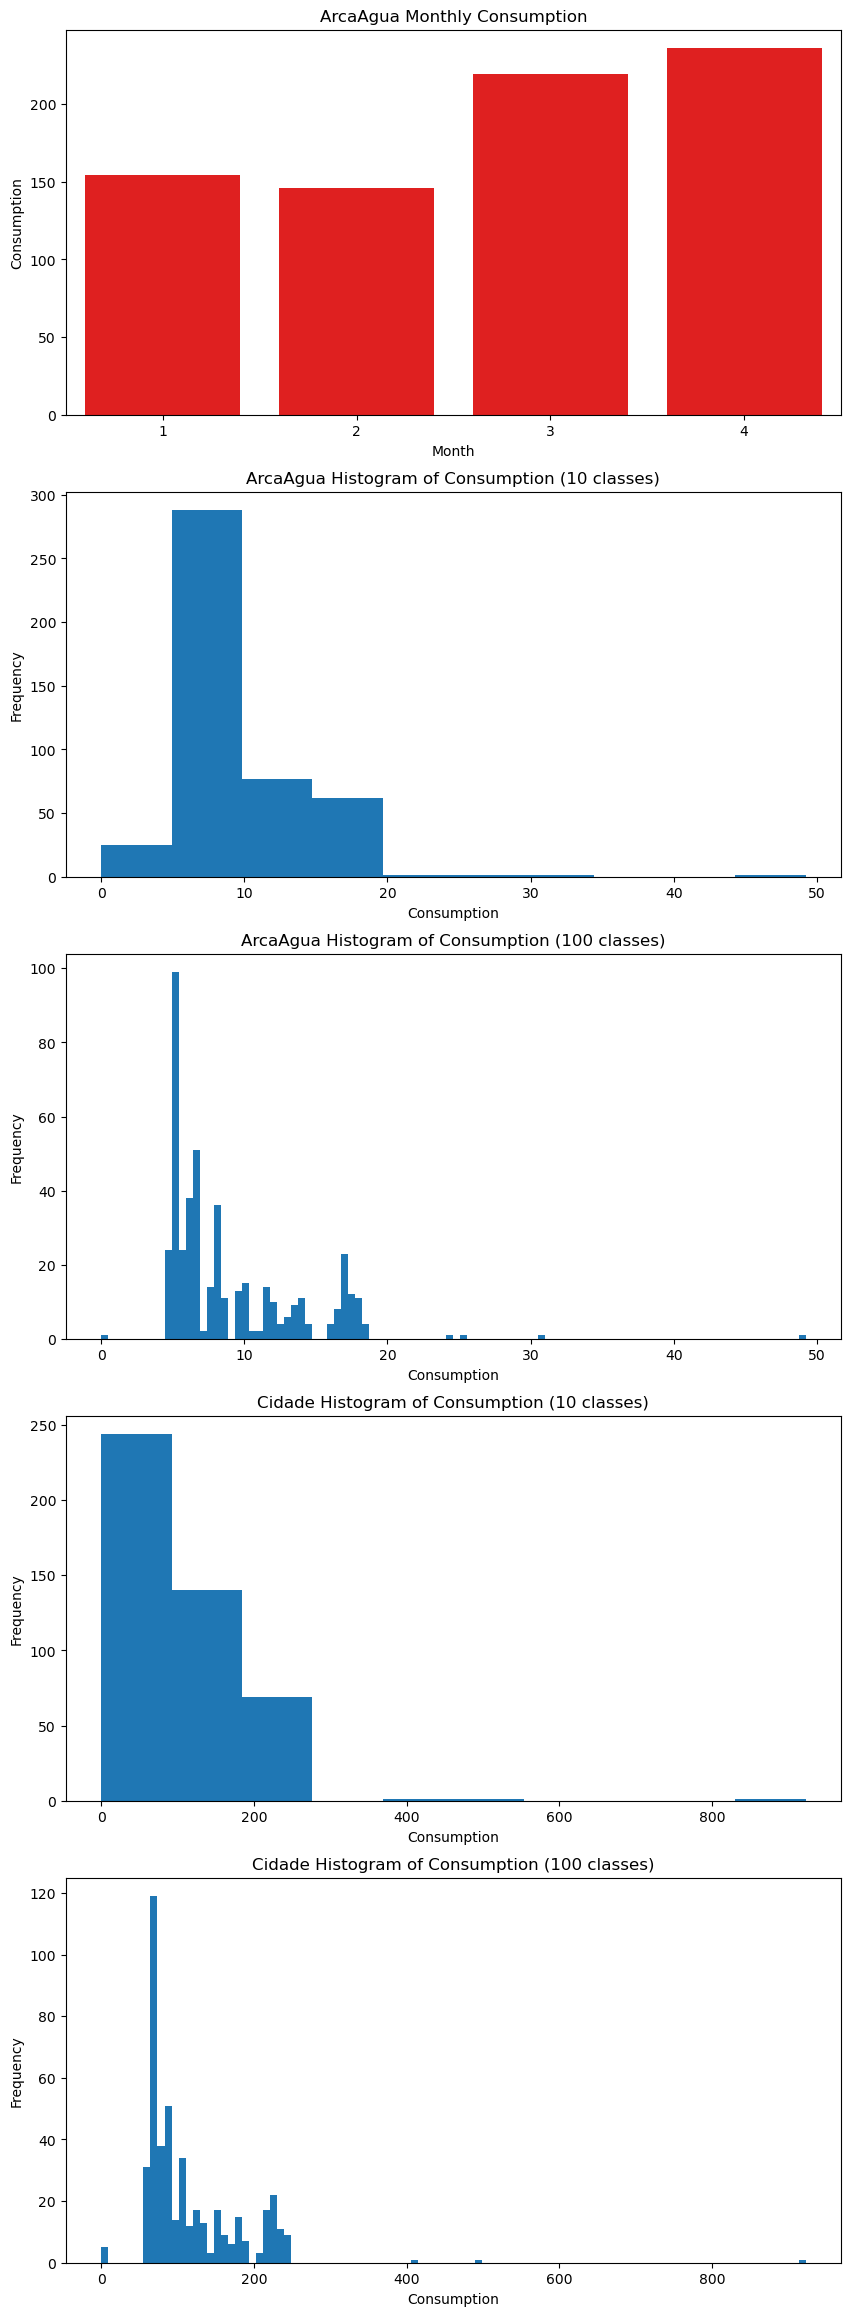

In [16]:
import numpy as np
import seaborn as sns
import pandas
from scipy import stats
import statistics as st
import matplotlib.pyplot as plt

#--- Inputs ---

print("------------------ PARK TO CREATE BARPLOT OF MONTHLY WATER CONSUMPTION ------------------")
inp_year = int(input("Year: "))
inp_startMonth = int(input("Start month: "))
inp_endMonth = int(input("End month: "))
inp_singularParkName = input("Singular park name: ")

print("------------------ PARKS TO ANALYZE AVERAGE MONHTLY WATER CONSUMPTION ------------------")
inp_numParks = input("Number of parks: ")
inp_parkList = list()

for i in range(int(inp_numParks)):
        inp_parkList.insert(i, input("Park name: "))

#--- Test Inputs ---

#inp_year = 2023
#inp_startMonth = 1
#inp_endMonth = 4
#inp_singularParkName = "ArcaAgua"

#inp_numParks = 1
#inp_parkList = ['Cidade']

#--- .csv read ---

waterConsumptionDF = pandas.read_csv('water_consumption.csv', delimiter=';')

#--- Parks with lowest and highest consumption ---
#functions returns sets to avoid same value park repetition

def parksWithHigherWaterConsumption():
        return set(waterConsumptionDF['Park'].loc[waterConsumptionDF['Consumption'] == waterConsumptionDF['Consumption'].max()])

def parksWithLowerWaterConsumption():
        dfConsumptionMoreThanZero = waterConsumptionDF[['Park', 'Consumption']].loc[waterConsumptionDF['Consumption'] != 0] #eliminate null (=0) values
        return set(waterConsumptionDF['Park'].loc[waterConsumptionDF['Consumption'] == dfConsumptionMoreThanZero['Consumption'].min(skipna=True)])

setParksWithHigherWaterConsumption = parksWithHigherWaterConsumption()
setParksWithLowerWaterConsumption = parksWithLowerWaterConsumption()

parksWithHigherWaterConsumptionQuant = len(setParksWithHigherWaterConsumption)
parksWithLowerWaterConsumptionQuant = len(setParksWithLowerWaterConsumption)

#setup to show multiple graphs (1(barplot) + 2 for each park with lowest/highest values) 
fig, axes = plt.subplots(1 + parksWithHigherWaterConsumptionQuant * 2 + parksWithLowerWaterConsumptionQuant * 2, 
                         1, 
                         figsize=(10, 5 + (12 * parksWithHigherWaterConsumptionQuant) + (12 * parksWithLowerWaterConsumptionQuant)))
#--- Functions ---

def monthWaterCost(parkName, month, year):
        selectedParkData = waterConsumptionDF.loc[waterConsumptionDF['Park'] == parkName]
        #filter just the selected month (and year)
        parkMonthData = selectedParkData.loc[(selectedParkData['Month'] == month) & (selectedParkData['Year'] == year)]
        
        monthConsumption = parkMonthData['Consumption'].sum()
        
        #calculation of month water cost
        if(monthConsumption <= 1000):
                return monthConsumption * 0.7
        else:
                return (1000 * 0.7) + ((monthConsumption - 1000) * 0.7 * 0.15)#adding extra tax

def avarageMonthlyWaterCost(parkName, year):
        selectedParkData = waterConsumptionDF.loc[(waterConsumptionDF['Park'] == parkName) & (waterConsumptionDF['Year'] == year)]
        
        sum = 0
        
        for month in selectedParkData['Month'].unique():
                sum += monthWaterCost(parkName, month, year)
        
        return sum / len(selectedParkData['Month'].unique())


def printAnalysis(parkName):
        selectedParkData = waterConsumptionDF.loc[waterConsumptionDF['Park'] == parkName]
        skewness = stats.skew(selectedParkData['Consumption'], bias=False)#coefficient of skewness

        #print(selectedParkData['Consumption'].describe())
        print(f"Mean: {selectedParkData['Consumption'].mean()}")
        print(f"Median: {selectedParkData['Consumption'].median()}")
        print(f"Standard Deviation: {selectedParkData['Consumption'].std()}")
        print(f"Coefficient of skewness: {round(skewness, 4)}")

def printRelativeAndAbsoluteFrequencyTables(parkName):
        selectedParkData = waterConsumptionDF.loc[waterConsumptionDF['Park'] == parkName]
        
        classDivision = selectedParkData['Consumption'].max() / 5
        
        bins = [0, classDivision, classDivision * 2, classDivision * 3, classDivision*4, round(selectedParkData['Consumption'].max(),2)]#the 5 classes
        
        classDivision = round(classDivision,2)
        
        labels = [f"0-{classDivision}", f"{classDivision}-{classDivision*2}", f"{classDivision*2}-{classDivision*3}", f"{classDivision*3}-{classDivision*4}", f"{classDivision*4}-{round(selectedParkData['Consumption'].max(),2)}"]#class labels
        
        #frequencyTable will hold both relative and absolute frequency
        frequencyTable = pandas.cut(selectedParkData['Consumption'], bins=bins, labels=labels, include_lowest=True).value_counts().reset_index()
        frequencyTable.columns = ['Consumption Range', 'Absolute Frequency']

        frequencyTable['Relative Frequency'] = frequencyTable['Absolute Frequency'] / frequencyTable['Absolute Frequency'].sum()
        
        print(frequencyTable.sort_values(by='Consumption Range'))

def checkOutlier(parkName):
        selectedParkData = waterConsumptionDF.loc[waterConsumptionDF['Park'] == parkName]
        #quartiles = st.quantiles(selectedParkData['Consumption'], n=4)
        #interquartileRange = quartiles[2] - quartiles[0]
        q3,q1 = np.percentile(selectedParkData['Consumption'].tolist(),[75,25])
        interquartileRange = q3 - q1
        print(f'Interquartile range: {interquartileRange}')
        print(f'Outliers:')
        consumptionList = selectedParkData['Consumption'].tolist()
        interquartileRangeUsed = interquartileRange * 1.5
        median = selectedParkData['Consumption'].median()
        outlierDates = []
        outliers = []
        for value in consumptionList:
            if(value - median > interquartileRangeUsed or median - value > interquartileRangeUsed):
                outliers.append(round(value,1))
        
        if outliers:
            print(outliers)
        else:
            print("None")

def barplotMonthlyConsumption(parkName, startMonth, endMonth, year):
        selectedParkData = waterConsumptionDF.loc[(waterConsumptionDF['Park'] == parkName) & (waterConsumptionDF['Year'] == year)]

        monthlyConsumption = selectedParkData.groupby('Month')['Consumption'].sum().reset_index()#Consumption for all months

        monthlyConsumption = monthlyConsumption[
                (monthlyConsumption['Month'].astype(int) >= startMonth) & 
                (monthlyConsumption['Month'].astype(int) <= endMonth)]#Filter by selected months
        
        sns.barplot(x='Month', y='Consumption', data=monthlyConsumption, color ='red', ax=axes[0])
        
        axes[0].set_title(f'{parkName} Monthly Consumption')

def drawHistogram10classes(parkName, i):
        selectedParkData = waterConsumptionDF.loc[waterConsumptionDF['Park'] == parkName]
        axes[i].hist(selectedParkData['Consumption'],bins=10)
        axes[i].set_title(f'{parkName} Histogram of Consumption (10 classes)')
        axes[i].set_xlabel('Consumption')
        axes[i].set_ylabel('Frequency')
        
def drawHistogram100classes(parkName, i):
        selectedParkData = waterConsumptionDF.loc[waterConsumptionDF['Park'] == parkName]
        axes[i].hist(selectedParkData['Consumption'],bins=100)
        axes[i].set_title(f'{parkName} Histogram of Consumption (100 classes)')
        axes[i].set_xlabel('Consumption')
        axes[i].set_ylabel('Frequency')

#--- Output ---

#Monthly consumption barplot
barplotMonthlyConsumption(inp_singularParkName,inp_startMonth,inp_endMonth,inp_year)

#Average monthly water cost per park
for park in inp_parkList:
        print(f"{park} average monthly water cost: {round(avarageMonthlyWaterCost(park, inp_year), 2)}€")
        
#Parks with lowest water consumption analyzis
intId = 1#intId is to put each graph in the correct axes index. Starts in 1 because 0 is the barplot

for park in parksWithLowerWaterConsumption():
        print(f"\n\n{park} Analysis (Has lowest consumption)\n")
        printAnalysis(park)
        printRelativeAndAbsoluteFrequencyTables(park)
        checkOutlier(park)
        drawHistogram10classes(park, intId)
        intId += 1
        drawHistogram100classes(park, intId)
        intId += 1
        
#Parks with highest water consumption analyzis
for park in parksWithHigherWaterConsumption():
        print(f"\n\n{park} Analysis (Has highest consumption)\n")
        printAnalysis(park)
        printRelativeAndAbsoluteFrequencyTables(park)
        checkOutlier(park)
        drawHistogram10classes(park, intId)
        intId += 1
        drawHistogram100classes(park, intId)
        intId += 1

## UC010 - View Equipment Usage Percentage
At every park exit there is an electronic device with a list of all the equipment available in there, and the user must indicate the equipment used in that day.<br>
This functionality reads the inquires awnsered by the users and draws a pie chart regarding the percentage of the equipment used in the park.

(-1.0999967971854023,
 1.0999996321591596,
 -1.0999996174091047,
 1.099999981781386)

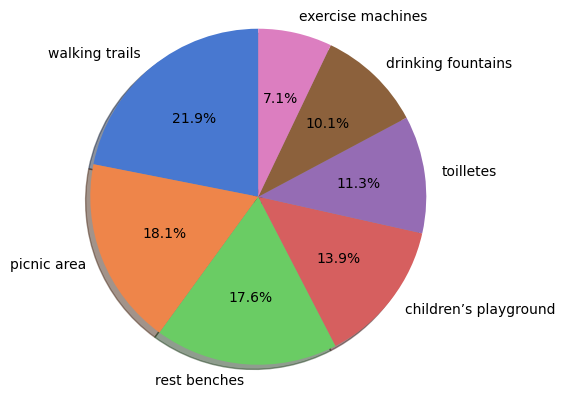

In [74]:
equipmentDF = pandas.read_csv('EquipmentUsed.csv', delimiter=';')

equipmentCount = equipmentDF['Equipment'].value_counts()

plt.pie(equipmentCount, labels=equipmentCount.index, autopct='%1.1f%%', startangle=90, shadow=True, colors=sns.color_palette('muted'))

plt.axis('equal')

## UC011 - View Park User Information
In the user portal some data is collected about the visitors, like age, recomendation of the park to other people and montly visits.<br>
With the user's answers two graphs are drawn:
- A pie chart of proportions of users that reccomend the park, divided by age group;
- A boxplot divided by age group, regarding the monthly frequency of visits.

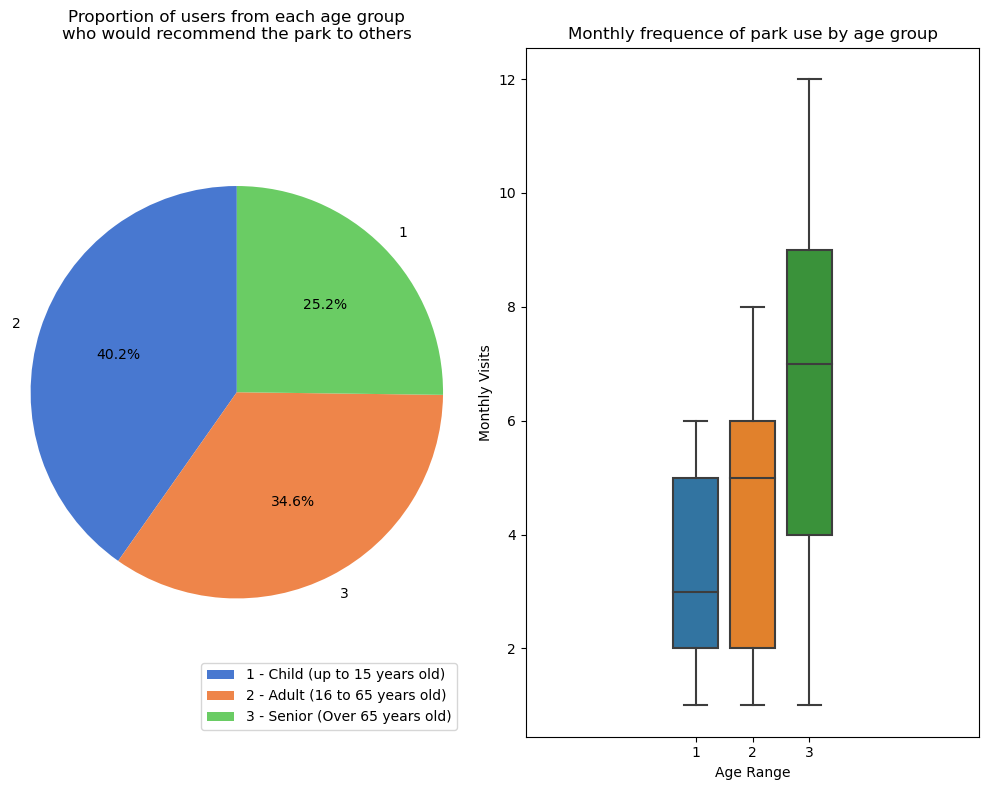

In [14]:
enquiryDF = pandas.read_csv('Inquiry.csv', delimiter=';')

peopleWhoRecomendDF = enquiryDF.loc[enquiryDF['Y/N'] == 'Y'].reset_index()#Filter all the users that recomend the park
countByRank = peopleWhoRecomendDF['Escalao'].value_counts()#Count the age range from the people that recomend

fig, axes = plt.subplots(1, 2, figsize=(10, 8))

axes[0].pie(countByRank, labels=countByRank.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('muted'))
axes[0].set_title('Proportion of users from each age group\nwho would recommend the park to others')
axes[0].legend(['1 - Child (up to 15 years old)', '2 - Adult (16 to 65 years old)', '3 - Senior (Over 65 years old)'], loc='lower right')
axes[0].axis('equal')

sns.boxplot(x='Escalao', y='Visits', data=enquiryDF[['Escalao','Visits']], ax=axes[1])
axes[1].set_title('Monthly frequence of park use by age group')
axes[1].set_xlabel('Age Range')
axes[1].set_ylabel('Monthly Visits')
axes[1].axis('equal')

plt.tight_layout()




# Team Member Contributions

- Miguel Maçedo (1212009): 80%
- Rui Silva (1231105): 5%
- Rodrigo Barbosa (1230573): 5%
- João Fonseca (1231138): 5%
- Márcio Ferreira (1230665): 5%

**IMPORTANT NOTE:** These percentages are accurate, however, we feel the need to justify this overwhelming imbalance: **Miguel Maçedo is only enrolled in MATCP, ESOFT, and LAPR2**. As such, he cannot assist in the implementation of any other US, as all other USs' implementations are based on MDISC and PPROG contents. **Miguel could only work on these USs**, so if other team members were to contribute heavily to their development, it would create a **huge** imbalance, globally, between the work performed between every team member. **We believe this imbalance is justified and should not reflect negatively on any other team member.** If anything, it should only reflect positively on Miguel's work.